**<div style="text-align: center; font-size: 24px;">Machine Failure Prediction and Classification</div>**


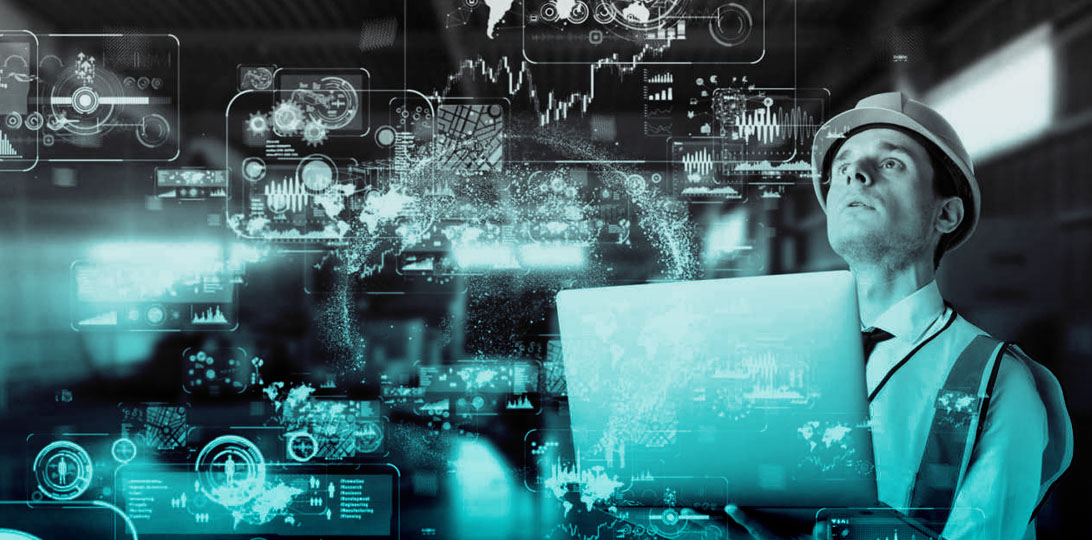

**- Business Problem:**

- In today's competitive industrial landscape, maximizing operational efficiency and minimizing downtime are critical objectives for organizations across various sectors. However, the reliability and performance of machinery pose significant challenges. Unforeseen equipment failures not only disrupt production schedules but also incur substantial repair costs and jeopardize employee safety.


- Traditional maintenance approaches, often reactive in nature, are no longer sufficient to address these challenges. Waiting for machinery to break down before taking action leads to costly downtime and hampers overall productivity. Therefore, there is a pressing need for proactive strategies that can anticipate potential failures and enable timely intervention to mitigate their impact.

**- Proposed Solution:**

- To tackle the business problem of machine failure prediction and classification, predictive maintenance offers a compelling solution. By leveraging advanced technologies and analytical techniques, predictive maintenance aims to anticipate potential failures based on data collected from machinery systems.


- Key parameters such as product quality type, air temperature, process temperature, rotational speed, torque, and tool wear serve as valuable indicators in predicting machinery health. Analyzing these parameters over time allows predictive models to identify patterns and anomalies indicative of impending failures.


- QuAM (Query Answering Machine) emerges as a powerful tool to address the business problem at hand. Equipped with a trained machine learning model, QuAM provides actionable insights into machinery health and performance. By inputting relevant information about a machine's operational characteristics and historical data, users can obtain predictive insights regarding potential failures and their associated types.

**Problem Type:**

Multi Class Classification

# D2.1: Data Collection:

### 1- Finding a dataset:

    https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification

**Dataset Composition:**

1. **UID:** Unique identifiers ranging from 1 to 10,000.

2. **productID:** Comprising a letter (L, M, or H) indicating low (50% of all products), medium (30%), and high (20%) product quality variants, along with a variant-specific serial number.

3. **air temperature [K]:** Generated via a random walk process and subsequently normalized to a standard deviation of 2 K around 300 K.

4. **process temperature [K]:** Generated through a random walk process normalized to a standard deviation of 1 K, then added to the air temperature plus 10 K.

5. **rotational speed [rpm]:** Derived from a power of 2860 W, with normally distributed noise overlaid.

6. **torque [Nm]:** Torque values follow a normal distribution around 40 Nm, with a standard deviation of 10 Nm and no negative values.

7. **tool wear [min]:** Tool wear duration, where quality variants H/M/L add 5/3/2 minutes respectively to the used tool in the process.

8. **Target:** Indicates whether the machine has failed (Failure) or not (Not Failure).

9. **Failure Type:** Specifies the type of failure if the machine has indeed failed.

### **2- Read dataset:**

- Load the CSV file into a pandas DataFrame.
- Display the first top rows to get an initial understanding of the data.

In [1]:
import pandas as pd

data = pd.read_csv('Predictive Maintenance Dataset.csv')

data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


### 3- Drop unnecessary columns:

We've removed several columns (`'Product ID'`, `'UDI'`, and `'Target'` ) from the DataFrame `data` using the `.drop()` method. Here's why we removed each column:

* **'Product ID'**: While this column identifies specific products, the product quality information we need (represented by H, L, and M) is already available in the `'Type'` column. Keeping both would be redundant.
* **'UDI'**: Unique Device Identifiers (UDIs) often don't provide valuable insights for machine learning tasks. They are more relevant for tracking individual devices than for understanding overall machine health.
* **'Target'**: This column might be a target variable for prediction. However, since the information it contains is captured in another target column (`'Failure Type'`), keeping both would be redundant.

In [2]:
columns_to_remove = ['Product ID', 'UDI', 'Target']

data = data.drop(columns=columns_to_remove)
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,M,298.1,308.6,1551,42.8,0,No Failure
1,L,298.2,308.7,1408,46.3,3,No Failure
2,L,298.1,308.5,1498,49.4,5,No Failure
3,L,298.2,308.6,1433,39.5,7,No Failure
4,L,298.2,308.7,1408,40.0,9,No Failure


By removing these columns, we streamline our data for further analysis and avoid introducing unnecessary features that might not contribute significantly to our models.

## 4- Rename columns:

- We've renamed several columns in the DataFrame `data` to improve clarity and better reflect their meaning.

In [3]:
data.rename(columns={'Type': 'Product Quality Type'}, inplace=True)
data.rename(columns={'Air temperature [K]': 'Air temperature'}, inplace=True)
data.rename(columns={'Process temperature [K]': 'Process temperature'}, inplace=True)
data.rename(columns={'Rotational speed [rpm]': 'Rotational speed'}, inplace=True)
data.rename(columns={'Torque [Nm]': 'Torque'}, inplace=True)
data.rename(columns={'Tool wear [min]': 'Tool wear'}, inplace=True)
data.rename(columns={'Failure Type': 'Machine Failure Type'}, inplace=True)

data.head()

,Product Quality Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine Failure Type
0,M,298.1,308.6,1551,42.8,0,No Failure
1,L,298.2,308.7,1408,46.3,3,No Failure
2,L,298.1,308.5,1498,49.4,5,No Failure
3,L,298.2,308.6,1433,39.5,7,No Failure
4,L,298.2,308.7,1408,40.0,9,No Failure


- These renames make the column names more self-explanatory and easier to understand during data exploration and analysis.

# D2.2: Data Analysis: Exploratory Data Analysis (EDA)

### **1- Check the dimensions of the dataset:**

- We need to check how many pieces of information (rows) we have in our data, and how many details (columns) describe each piece.

In [4]:
num_rows, num_columns = data.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 10000
Number of columns: 7


- Knowing this size helps us understand what we're working with and how much data we have to analyze.

## **2- Inspect the data types of each column:**

In [5]:
column_data_types = data.dtypes
print(column_data_types)

Product Quality Type     object
Air temperature         float64
Process temperature     float64
Rotational speed          int64
Torque                  float64
Tool wear                 int64
Machine Failure Type     object
dtype: object


-As we can see, our data has 7 columns in total:

* **5 columns** contain numerical data (numbers) like air temperature, process temperature, rotational speed, torque, and tool wear.
* The remaining **2 columns** are categorical. This means they contain categories or labels like "Product Quality Type" and "Machine Failure Type,"

- Knowing these types helps us clean and analyze the data correctly. For instance, we might need to use different cleaning techniques for numerical data compared to categorical data.


### **3- Check for missing values:**

In [6]:
missing_values_exist = data.isnull().values.any()

if missing_values_exist:
    print("Missing values exist.")
else:
    print("No missing values.")

No missing values.


- "No missing values." indicates our data seems complete.

### **4- Check for duplicates:**

In [7]:
duplicates_exist = data.duplicated().any()

if duplicates_exist:
    print("Duplicates exist.")
else:
    print("No duplicates.")

No duplicates.


- The message "No duplicates." indicates our data seems clean, with no repetitions found!

- Having a dataset with no duplicates is a big win! It ensures we're working with unique data points, leading to more reliable and accurate results when we analyze the data. 

### 5- Summary Statistics for numerical columns:

In [8]:
summary_stats = data.describe()

print("Summary Statistics:")
summary_stats

Summary Statistics:


,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000
std,2.000259,1.483734,179.284096,9.968934,63.654147
min,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000


#### Insights:

This code block calculates summary statistics for each column in our dataset, stored in the variable `data`. Summary statistics provide a concise overview of the central tendency (average) and spread (variability) of the data. Let's break down the output (`summary_stats`) and glean some insights:

**- Understanding the Table:**

* **Columns:** Represent the names of each feature in your data (e.g., "Air temperature", "Rotational speed").
* **Rows:** Describe different statistical measures for each feature.
    * **Mean:** Represents the average value for each feature.
    * **Std (Standard Deviation):** Indicates how spread out the data is from the mean. A higher standard deviation suggests more variability in the data.
    * **Min (Minimum):** Shows the lowest value observed for each feature.
    * **25% (1st Quartile):** Represents the value below which 25% of the data points lie.
    * **50% (Median):** The middle value when the data is ordered from least to greatest.
    * **75% (3rd Quartile):** Represents the value below which 75% of the data points lie.
    * **Max (Maximum):** Shows the highest value observed for each feature.

**- Insights from the Data:**

* **Temperature and Speed:** Based on the means, the "Process temperature" seems slightly higher on average than the "Air temperature". The standard deviations for both temperatures are relatively low, suggesting the data might be clustered around the mean. Similarly, the "Rotational speed" has a low standard deviation, indicating the speed might be tightly controlled.
* **Torque and Wear:** The "Torque" values seem to have a wider range compared to other features, evident from the higher minimum and maximum values and a larger standard deviation. This suggests more variation in torque levels. The "Tool wear" also shows some variability, with a higher standard deviation than temperature or speed.

### 6- Summary Statistics for categorical columns:

In [9]:
for column in ['Product Quality Type', 'Machine Failure Type']:
    unique_values = data[column].unique()
    frequency_counts = data[column].value_counts()
    mode_value = data[column].mode()[0]
    
    print(f"{column} - Unique Values:")
    print(unique_values)
    print(f"\n{column} - Frequency Counts:")
    print(frequency_counts)
    print(f"\n{column} - Mode:")
    print(mode_value)
    print("\n")

Product Quality Type - Unique Values:
['M' 'L' 'H']

Product Quality Type - Frequency Counts:
L    6000
M    2997
H    1003
Name: Product Quality Type, dtype: int64

Product Quality Type - Mode:
L


Machine Failure Type - Unique Values:
['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']

Machine Failure Type - Frequency Counts:
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Machine Failure Type, dtype: int64

Machine Failure Type - Mode:
No Failure




#### Exploring Categorical Features: Unique Values, Frequencies, and Modes

This code block dives into the categorical features of our dataset, "Product Quality Type" and "Machine Failure Type". Categorical features represent data that can be classified into distinct categories or labels.

**Understanding the Output:**

For each categorical feature, the code outputs three key pieces of information:

* **Unique Values:** This shows the distinct categories or labels present in the data (e.g., "M", "L", "H" for "Product Quality Type").
* **Frequency Counts:** This indicates how often each category appears in the data. It's displayed as a Series where the index represents the category and the values represent the count (e.g., "L" has 6000 occurrences in "Product Quality Type").
* **Mode:** This identifies the most frequent category (e.g., "L" for "Product Quality Type").

**Analysis of "Product Quality Type":**

* There are three unique product quality types: "M", "L", and "H". 
* "L" is the most frequent quality type, appearing 6000 times, followed by "M" (2997 times) and "H" (1003 times). 

**Analysis of "Machine Failure Type":**

* Six distinct machine failure types are identified: "No Failure", "Power Failure", "Tool Wear Failure", "Overstrain Failure", "Random Failures", and "Heat Dissipation Failure".
* The most frequent failure type is "No Failure" with 9652 occurrences. 
* Other failure types are significantly less frequent, with "Heat Dissipation Failure" having the fewest occurrences (112).

**Insights:**

By analyzing unique values, frequency counts, and modes, we gain valuable insights into the distribution of categorical data. In this case, we learned about the prevalent product quality types and the most common (and least common) machine failure types. This information can be helpful for further data exploration and analysis.


### 7- Visualize the distribution of numerical variables:

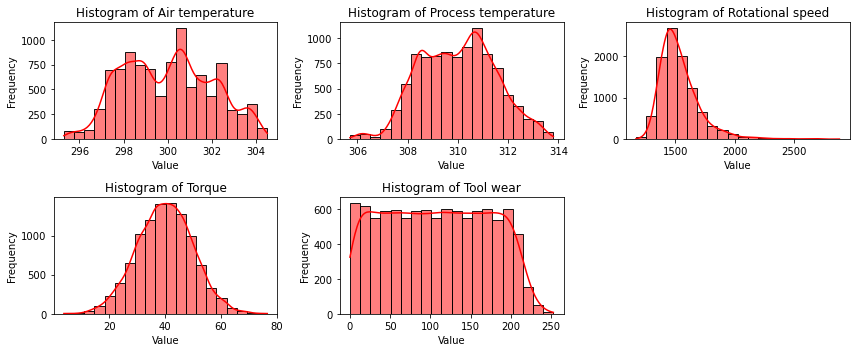

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

numeric_cols = ['Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear']

plt.figure(figsize=(12, len(numeric_cols) // 2 + len(numeric_cols) % 2 * 3)) 

for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols) // 2, 2 if len(numeric_cols) % 2 == 0 else 3, i + 1) 
    sns.histplot(data=data, x=col, bins=20, kde=True, color='red')  
    plt.title(f'Histogram of {col}')  
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout() 
plt.show()

#### - Observations on Feature Distributions:

* **Air Temperature Distribution:** Likely normal (bell-shaped), indicating most values fall within a central range with fewer extremes.
* **Process Temperature Distribution:** Similar to Air Temperature, likely normal (bell-shaped) with most values concentrated around the center.
* **Rotational Speed Distribution:** Possibly normal (bell-shaped) with a central tendency and spread reflecting variability in speeds. There might be a slight left skew (more data towards lower speeds).
* **Torque Distribution:** Potential bimodality, with two distinct peaks suggesting two frequent ranges of torque values.
* **Tool Wear Distribution:** Possible right skew, indicating more frequent occurrences of lower tool wear values compared to higher wear.


- Understanding feature distributions helps us choose suitable scalars for normalization or standardization. For example:

- Normal distributions might use standard scalars.
- Skewed distributions may require transformations like power or log.
- But, it's premature to finalize scalars as data might change with resampling.

### 8- Explore the distribution of categorical variables:

#### - Explore the distribution of Product Quality Type using bar plots:

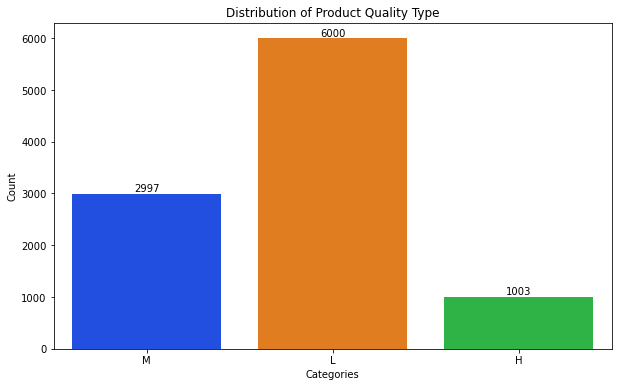

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='Product Quality Type', palette='bright') 
plt.title('Distribution of Product Quality Type')
plt.xlabel('Categories')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')

plt.show()

**Observations and Insights:**

- "L" is the most frequent product quality type, indicated by the tallest bar on the chart.
- "M" and "H" likely have lower counts compared to "L" based on the relative heights of their bars.

#### - Explore the distribution of Machine Failure Type using bar plots:

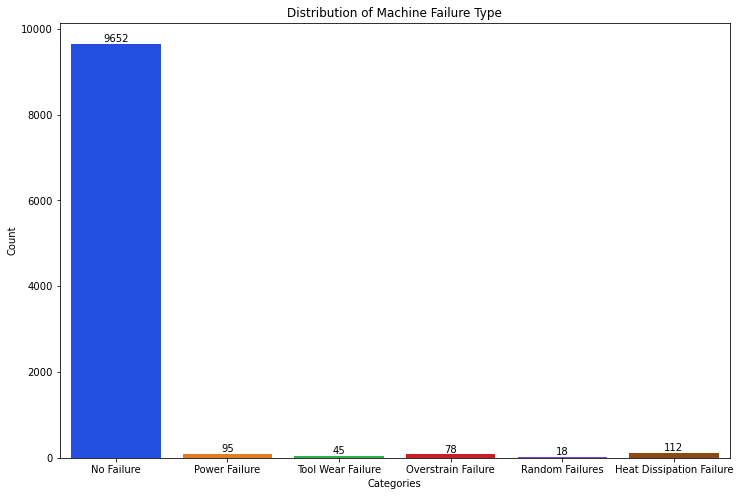

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
ax = sns.countplot(data=data, x='Machine Failure Type', palette='bright') 
plt.title('Distribution of Machine Failure Type')
plt.xlabel('Categories')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')

plt.show()

#### - Observations and Insights:

- The bar chart reveals an imbalance in machine failure types. "No Failure" appears most frequent, which may lead to bias towards the majority class during model training.

- This imbalance can lead to inaccurate predictions for less frequent failure types.

- We should consider a technique to address class imbalance and achieve a more balanced representation in the data. This can help train models that perform better at predicting all failure types, including the less frequent ones.


**- Explore pairwise relationships between numerical variables using correlation matrices:**

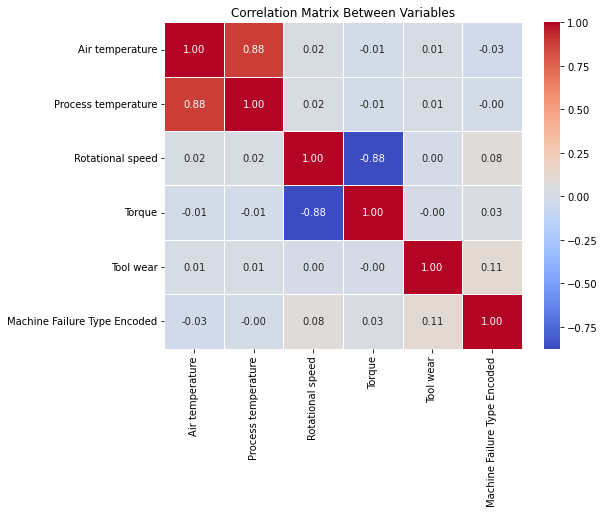

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Machine Failure Type Encoded'] = label_encoder.fit_transform(data['Machine Failure Type'])

correlation_matrix = data[['Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear', 'Machine Failure Type Encoded']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Between Variables')
plt.show()

### Correlation Matrix Insights:

**Key Observations:**

* **Strong Positive Correlation:** Air temperature and Process temperature (0.88): This high positive correlation indicates that these two variables tend to move together in the same direction. An increase in air temperature is likely to be accompanied by an increase in process temperature, and vice versa.
* **Strong Negative Correlation:** Torque and Tool wear (-0.88): This strong negative correlation suggests that these variables often have opposite trends. Higher torque might be associated with less tool wear, and vice versa.

**Discussion: Feature Redundancy:**

- While a correlation of 0.88 (or -0.88) is indeed strong, it doesn't necessarily mean the variables are identical. They might still capture slightly different aspects of the process(might still hold unique information that benefits a machine learning model).

- It is noted that there is a slight correlation between each of the predictive variables and the target variable, except for the Process Temperature variable, where the correlation is non-existent. The reason for this is the lack of data and the imbalance in its classes.

In [14]:
data.drop(columns=['Machine Failure Type Encoded'], inplace=True)

### 9- Investigate the relationship between numerical and categorical variables:

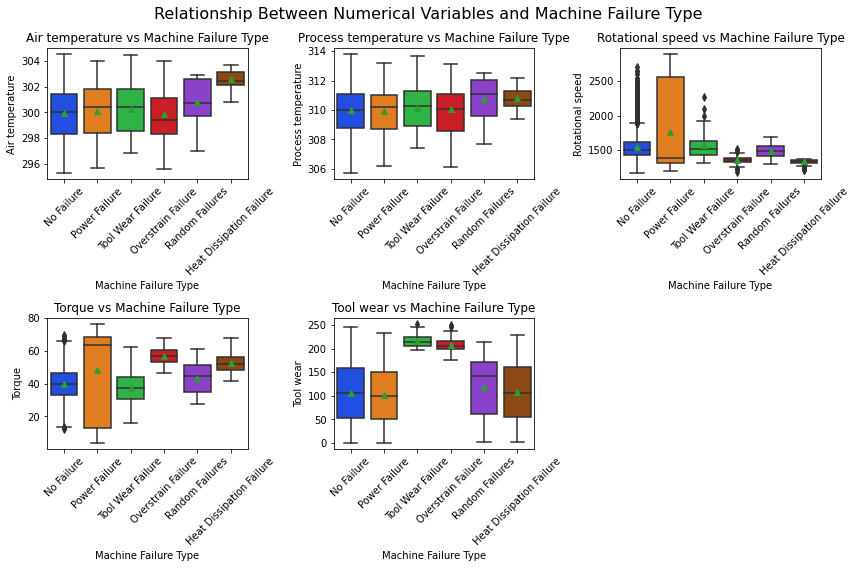

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear']
nrows = 2  
ncols = 3 

plt.figure(figsize=(12, nrows * 4))  

for i, col in enumerate(numeric_cols):
    ax = plt.subplot(nrows, ncols, i + 1)  
    sns.boxplot(
        data=data,
        x="Machine Failure Type",
        y=col,
        showmeans=True,  
        palette="bright",
        ax=ax
    )
    ax.set_title(f'{col} vs Machine Failure Type')  
    ax.set_xlabel('Machine Failure Type')
    ax.set_ylabel(col)
    plt.xticks(rotation=45)  

plt.suptitle('Relationship Between Numerical Variables and Machine Failure Type', fontsize=16)

plt.tight_layout()
plt.show()

#### - Observations and Insights:

- Higher temperatures appear to be associated with certain failure types such as "Heat Dissipation Failure"
- Lower temperatures promote normal functioning, as seen with the prevalence of "No Failure" events at lower temperatures.
- Certain failure types, such as "Power Failure," seem to correlate with higher rotational speeds.
- Higher torque values are correlated with certain failure types, such as "Power Failure" and "Overstrain Failure".
- increased tool wear values are observed in conjunction with "Tool Wear Failure" and "Overstrain Failure".

# D2.3: Data Wrangling:

### - Identifying outliers in numerical variables:

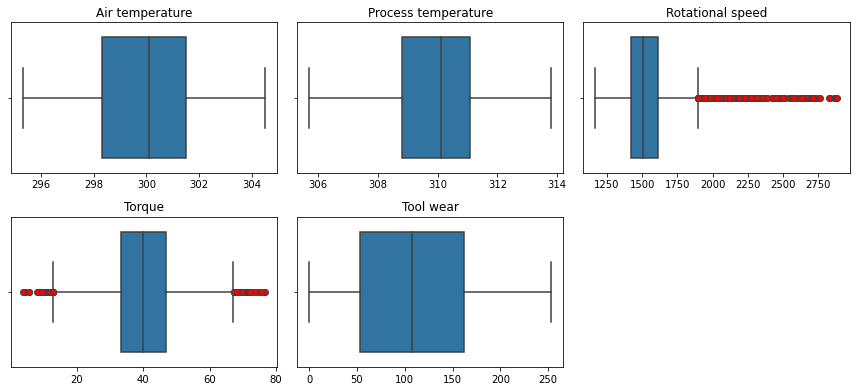

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[column], flierprops=dict(marker='o', markerfacecolor='red', markersize=6))
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

**Insight:**
    
- While we have identified outliers in the dataset, it's important to note that in the domain of failure prediction in machines, these outliers may carry significant meaning and should not be simply discarded. Outliers in machine data can often represent abnormal operating conditions, rare failure events, or anomalies that are crucial for understanding the health and performance of the machines. Ignoring these outliers could lead to a loss of important insights and hinder the effectiveness of our predictive models. Therefore, we should carefully analyze and consider these outliers in our analysis, as they may provide valuable clues for detecting and mitigating potential failures in the machines

In [17]:
data.head()

,Product Quality Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine Failure Type
0,M,298.1,308.6,1551,42.8,0,No Failure
1,L,298.2,308.7,1408,46.3,3,No Failure
2,L,298.1,308.5,1498,49.4,5,No Failure
3,L,298.2,308.6,1433,39.5,7,No Failure
4,L,298.2,308.7,1408,40.0,9,No Failure


### - Introduce missing values: 

- We randomly selected indices for numerical and categorical columns and replaced corresponding values with NaN.
- 36 missing values were introduced in numerical columns, and 18 missing values in categorical columns.

**- Purpose:**

- Dataset was deliberately made "dirty" to show ability to handle missing data effectively in data preprocessing.

In [18]:
import numpy as np

data_copy = data.copy()

num_missing = 36 
cat_missing = 18 

num_indices = np.random.choice(data_copy.index, num_missing, replace=False)
data_copy.loc[num_indices, 'Air temperature'] = np.nan

cat_indices = np.random.choice(data_copy.index, cat_missing, replace=False)
data_copy.loc[cat_indices, 'Product Quality Type'] = np.nan

missing_values_copy = data_copy.isnull().sum()
print("Missing Values in Copied Data:\n", missing_values_copy)

Missing Values in Copied Data:
 Product Quality Type    18
Air temperature         36
Process temperature      0
Rotational speed         0
Torque                   0
Tool wear                0
Machine Failure Type     0
dtype: int64


### - Fill (Imputate) the missing values:

- Calculated the mean of "Air temperature" and filled missing values with this mean.
- Determined the mode of "Product Quality Type" and filled missing values with this mode.

In [19]:
mean_air_temperature = data_copy['Air temperature'].mean()
data_copy['Air temperature'].fillna(mean_air_temperature, inplace=True)

mode_product_quality_type = data_copy['Product Quality Type'].mode()[0]
data_copy['Product Quality Type'].fillna(mode_product_quality_type, inplace=True)

missing_values_after_fill = data_copy.isnull().sum()
print("Missing Values After Fill:\n", missing_values_after_fill)

Missing Values After Fill:
 Product Quality Type    0
Air temperature         0
Process temperature     0
Rotational speed        0
Torque                  0
Tool wear               0
Machine Failure Type    0
dtype: int64


### - Add some duplicate:

Duplicate some entries in your dataset to mimic data entry errors or replication issues.

In [20]:
num_duplicates = 66 
duplicates = pd.concat([data_copy] * num_duplicates, ignore_index=True)

print("Number of Duplicate Rows Added:", num_duplicates)

Number of Duplicate Rows Added: 66


### - Remove duplicate rows:

In [21]:
clean_data = duplicates.drop_duplicates()

clean_data

,Product Quality Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine Failure Type
0,M,298.1,308.6,1551,42.8,0,No Failure
1,L,298.2,308.7,1408,46.3,3,No Failure
2,L,298.1,308.5,1498,49.4,5,No Failure
3,L,298.2,308.6,1433,39.5,7,No Failure
4,L,298.2,308.7,1408,40.0,9,No Failure
...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,No Failure
9996,H,298.9,308.4,1632,31.8,17,No Failure
9997,M,299.0,308.6,1645,33.4,22,No Failure
9998,H,299.0,308.7,1408,48.5,25,No Failure


### - Encoding the categorical columns:

- We utilize LabelEncoder from scikit-learn to convert the categorical feature 'Product Quality Type' into numerical representations. Label encoding assigns unique integer labels (0, 1, 2, etc.) to each category present in the feature. This transformation enables machine learning algorithms to work with categorical data effectively, enhancing their performance.

In [22]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['Product Quality Type'] = label_encoder.fit_transform(data['Product Quality Type'])

data.head()

,Product Quality Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine Failure Type
0,2,298.1,308.6,1551,42.8,0,No Failure
1,1,298.2,308.7,1408,46.3,3,No Failure
2,1,298.1,308.5,1498,49.4,5,No Failure
3,1,298.2,308.6,1433,39.5,7,No Failure
4,1,298.2,308.7,1408,40.0,9,No Failure


### - Define X and y
In this section, we define our feature matrix `X` and target variable `y`.

In [23]:
X = data.drop(columns=['Machine Failure Type'])
y = data['Machine Failure Type']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (10000, 6)
Shape of y: (10000,)


### - Data Resampling:

To address class imbalance, we combine techniques. This involves undersampling the majority class using RandomUnderSampler and oversampling the minority classes using SMOTE. This balances the class distribution, ensuring equitable representation while maintaining dataset size.

In [24]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

pipeline = Pipeline([
    ('undersample', RandomUnderSampler(sampling_strategy='majority')),
    ('oversample', SMOTE(sampling_strategy='auto', random_state=42))
])

X_resampled, y_resampled = pipeline.fit_resample(X, y)

### - Plot class distribution after  resampling:

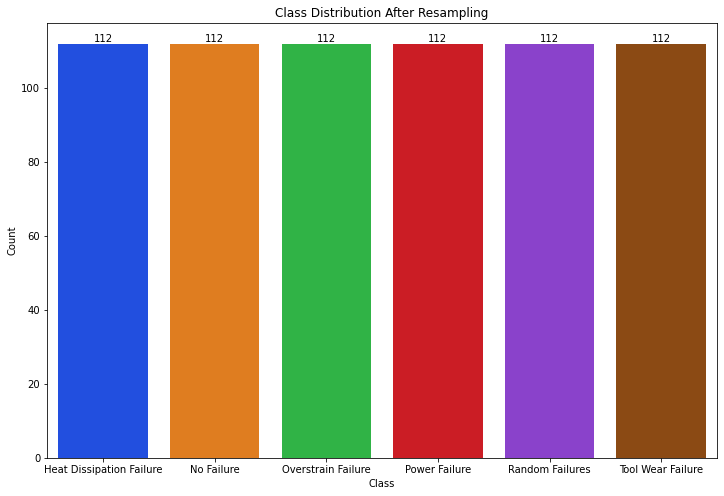

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

class_counts = y_resampled.value_counts().sort_index()

plt.figure(figsize=(12, 8))
sns.countplot(x=y_resampled, palette='bright') 
plt.title('Class Distribution After Resampling')
plt.xlabel('Class')
plt.ylabel('Count')

for i, count in enumerate(class_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

plt.show()

**Insights:**

- Equal representation achieved: Each class now has 112 data points, ensuring fair training.
- Imbalance addressed: Resampling techniques balanced the class distribution effectively.
- Expected better generalization: Balanced classes improve model performance on new data.
- Improved model performance: Balanced dataset leads to better model accuracy and metrics.

**- Examine relationships between categorical variables Using crosstabs:**

<Figure size 864x576 with 0 Axes>

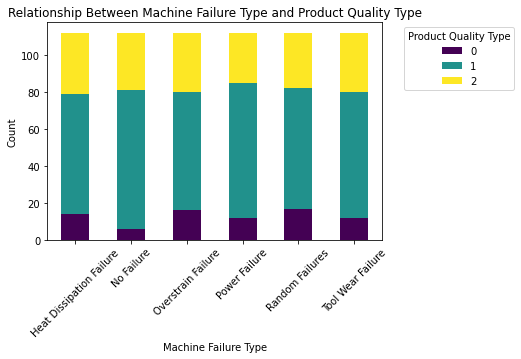

In [26]:
import matplotlib.pyplot as plt

crosstab = pd.crosstab(y_resampled, X['Product Quality Type'])

plt.figure(figsize=(12, 8))
crosstab.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Relationship Between Machine Failure Type and Product Quality Type')
plt.xlabel('Machine Failure Type')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.legend(title='Product Quality Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Observations and Insights:

- All product quality types appear with machine failure type, with type 1 (M) predominant in all classes, then to a lesser extent 2 (H), then 0.

- “No failure” is associated with little occurrence of Type 0 (L)

# D2.4: Feature Engineering:

### - Create New Features:
New features are created to extract more informative representations from the raw data:

- **Temperature Differential:**
A new column, 'Temperature Differential,' is added by subtracting 'Air temperature' from 'Process temperature.'
This feature may indicate heat transfer efficiency or potential overheating.

- **Power Consumption:**
'Power Consumption' is computed by multiplying 'Rotational speed' and 'Torque.'
It captures the machine's energy usage and stress levels.
These new features enrich the data representation and may enhance machine learning model performance in predicting machine failures. Evaluating their effectiveness is crucial in model training and analysis.







In [27]:
X_resampled['Temperature Differential'] = X_resampled['Process temperature'] - X_resampled['Air temperature']

X_resampled['Power Consumption'] = X_resampled['Rotational speed'] * X_resampled['Torque']

**- Display the new features:**

In [28]:
X_resampled.head()

,Product Quality Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Temperature Differential,Power Consumption
0,2,300.8,309.4,1342,62.4,113,8.6,83740.8
1,1,302.3,310.9,1377,46.8,166,8.6,64443.6
2,1,302.3,310.8,1377,47.3,22,8.5,65132.1
3,1,302.3,310.9,1379,49.3,34,8.6,67984.7
4,2,302.3,310.9,1360,44.0,67,8.6,59840.0


### - Plot the features' distributions:
We need to plot the features' distributions to determine the appropriate scalar for scaling.

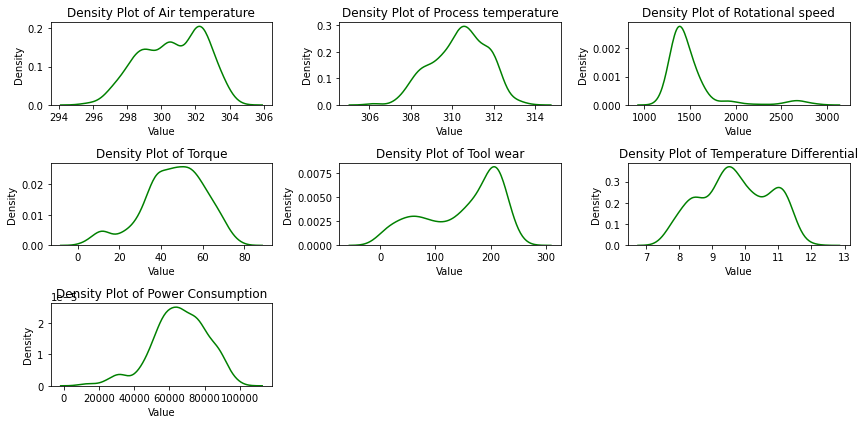

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

numeric_cols = ['Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear', 'Temperature Differential', 'Power Consumption']

plt.figure(figsize=(12, len(numeric_cols) // 2 + len(numeric_cols) % 2 * 3))  

for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols) // 2, 2 if len(numeric_cols) % 2 == 0 else 3, i + 1)
    sns.kdeplot(data=X_resampled, x=col, color='green')  
    plt.title(f'Density Plot of {col}')  
    plt.xlabel('Value')
    plt.ylabel('Density')  

plt.tight_layout()
plt.show()

### - Observations:
- Upon examining the plot post-resampling, we observe substantial changes in the variable distributions. Specifically, we see a combination of normal distributions (e.g., Air temperature) and skewed distributions (e.g., Tool wear).

- In light of this observation, it's prudent to choose RobustScaler over StandardScaler.

- Where RobustScaler centers and scales data based on median and interquartile range, ensuring better model stability, as it is less sensitive to outliers.

In [30]:
from sklearn.preprocessing import RobustScaler
import joblib

scaler = RobustScaler()

X_scaled = scaler.fit_transform(X_resampled)

joblib.dump(scaler, 'scaler.pkl')

print("Shape of X_scaled:", X_scaled.shape)

Shape of X_scaled: (672, 8)


### - Encode the target variable y:

We used the LabelEncoder to transform the target variable y_resampled into numerical labels. Each distinct value in y_resampled received a unique integer label. The resulting encoding dictionary maps each unique y value to its corresponding encoded label. This dictionary facilitates the decoding of predictions back to their original labels during prediction.

In [31]:
label_encoder = LabelEncoder()

y_encoded = label_encoder.fit_transform(y_resampled)

encoding_dict = {label: index for index, label in enumerate(label_encoder.classes_)}

print("Encoding Dictionary:")
print(encoding_dict)

Encoding Dictionary:
{'Heat Dissipation Failure': 0, 'No Failure': 1, 'Overstrain Failure': 2, 'Power Failure': 3, 'Random Failures': 4, 'Tool Wear Failure': 5}


### - Convert processed X,y into DataFrames:
That can facilitate final dataset creation

In [32]:
X_df = pd.DataFrame(X_scaled, columns=X_resampled.columns)

y_df = pd.DataFrame(y_encoded, columns=['Machine Failure Type'])

### - Feature Selection:

We will calculate the correlation coefficients between each feature and the target variable to identify features that exhibit a meaningful correlation. This process allows us to select features that are potentially influential in predicting the target variable, aiding in the construction of a more effective predictive model.

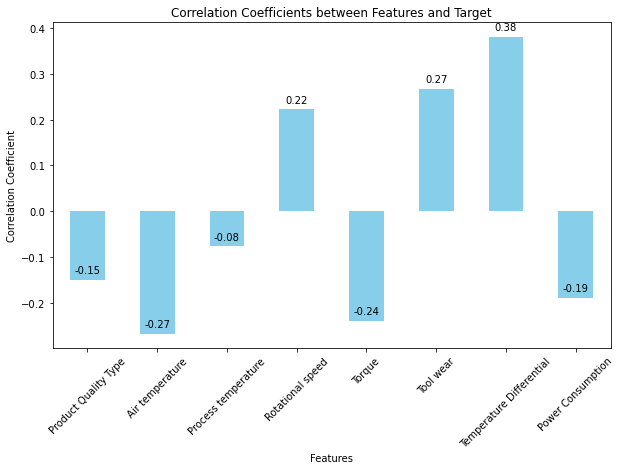

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

correlations = X_df.corrwith(y_df['Machine Failure Type'])

# Plot correlation coefficients
plt.figure(figsize=(10, 6))
ax = correlations.plot(kind='bar', color='skyblue')
plt.title('Correlation Coefficients between Features and Target')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)

# Annotate each bar with its correlation coefficient value
for i, v in enumerate(correlations):
    ax.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.show()

### Results:

After plotting the correlation coefficients, we observe that all features demonstrate a meaningful correlation with the target variable, with some showing positive correlations and others negative. Given this insight, we've decided to retain all features for machine learning purposes and opt not to exclude any from our analysis. This ensures that we leverage the full range of information provided by the features to develop an effective predictive model.

### - Create the final dataset: 

In [34]:
final_dataset = pd.concat([X_df, y_df], axis=1)
final_dataset

,Product Quality Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Temperature Differential,Power Consumption,Machine Failure Type
0,1.0,0.032418,-0.564988,-0.402332,0.791096,-0.502146,-0.603216,0.881473,0
1,0.0,0.518683,0.221816,-0.198251,-0.009568,-0.047210,-0.603216,-0.077786,0
2,0.0,0.518683,0.169362,-0.198251,0.016094,-1.283262,-0.662125,-0.043561,0
3,0.0,0.518683,0.221816,-0.186589,0.118744,-1.180258,-0.603216,0.098241,0
4,1.0,0.518683,0.221816,-0.297376,-0.153277,-0.896996,-0.603216,-0.306630,0
...,...,...,...,...,...,...,...,...,...
667,-1.0,0.220057,0.052321,0.897959,-0.427020,0.356223,-0.250912,-0.273176,5
668,0.0,0.680213,0.465093,0.122449,-0.020680,0.450644,-0.623528,0.034756,5
669,0.0,-0.529543,-0.666901,2.997085,-1.227656,0.253219,0.303513,-1.073950,5
670,0.0,-0.756728,-0.847603,1.119534,-0.555600,0.416309,0.513411,-0.399765,5


This is the dataset that we will be using to train our models for QuAM.

### - Save the final dataset: 

In [35]:
final_dataset.to_csv('final_dataset.csv', index=False)

# D3: Query Answering Machine

### - Read the final dataset:

In [36]:
import pandas as pd

final_dataset = pd.read_csv('final_dataset.csv')

final_dataset.head()

,Product Quality Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Temperature Differential,Power Consumption,Machine Failure Type
0,1.0,0.032418,-0.564988,-0.402332,0.791096,-0.502146,-0.603216,0.881473,0
1,0.0,0.518683,0.221816,-0.198251,-0.009568,-0.047210,-0.603216,-0.077786,0
2,0.0,0.518683,0.169362,-0.198251,0.016094,-1.283262,-0.662125,-0.043561,0
3,0.0,0.518683,0.221816,-0.186589,0.118744,-1.180258,-0.603216,0.098241,0
4,1.0,0.518683,0.221816,-0.297376,-0.153277,-0.896996,-0.603216,-0.306630,0


### - Build QuAM:


With the final dataset prepared, we're now ready to build our QuAM.
- This process starts by separating the features (X) from the target variable (y). 
- Features represent the input data the model will learn from, while the target variable is what we're trying to predict.
- Next, we split the data into training and testing sets. The training set (X_train, y_train) will be used to train the model, 
- and the testing set (X_test, y_test) will be used to evaluate its performance on unseen data. 
- We set the test size to 20% (test_size=0.2) and a random state (random_state=42) for reproducibility.

In [37]:
from sklearn.model_selection import train_test_split

X = final_dataset.drop(columns=['Machine Failure Type'])
y = final_dataset['Machine Failure Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Solution1: Support Vector Machine Classifier

**Solution and Justification:**  
- Support Vector Classifier (SVC) is chosen due to its effectiveness in handling multi-class classification tasks with non-linear decision boundaries. Given the complexity of the machine failure type classification problem, SVC is a suitable choice. The grid search approach is employed to tune hyperparameters, aiming to optimize SVC's performance.

**Solution Details:**  
- **Hyperparameter Tuning:** Grid search is performed over a defined hyperparameter grid containing regularization parameter (C), kernel type, and gamma values for the 'rbf' kernel.
- **Model Training:** The SVC model is trained with the best hyperparameters obtained from grid search.
- **Testing:** The tuned model is evaluated on the test set to assess its performance.
- **Performance Metrics:** Test accuracy is calculated to measure the accuracy of the tuned SVC model. Additionally, classification report can be generated to examine precision, recall, and F1-score for each class.


In [38]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import time

param_grid = {
    'C': [0.1, 1, 10],                 
    'kernel': ['linear', 'rbf'],       
    'gamma': ['scale', 'auto']         
}

svm_model = SVC()

grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params_svm = grid_search.best_params_
print("Best Hyperparameters for SVM:", best_params_svm)

best_svm_model = SVC(**best_params_svm)

start_time = time.time()
best_svm_model.fit(X_train, y_train)
end_time = time.time()
training_time_svm = end_time - start_time
print("Training Time:", round(training_time_svm, 4), "seconds")

y_pred_svm_tuned = best_svm_model.predict(X_test)

Best Hyperparameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Training Time: 0.026 seconds


### Visualize the trained model:
- By plotting the confusion matrix:

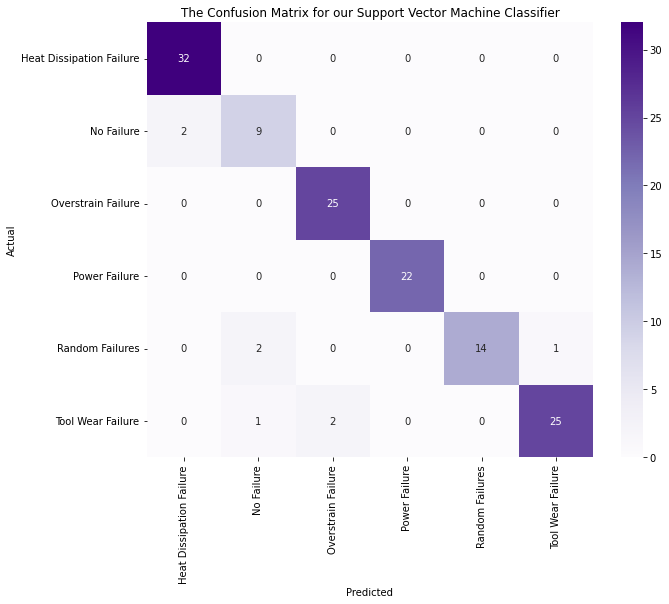

In [40]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

class_names = ['Heat Dissipation Failure', 'No Failure', 'Overstrain Failure', 'Power Failure', 'Random Failures', 'Tool Wear Failure']

cm = confusion_matrix(y_test, y_pred_svm_tuned)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Purples', fmt='g', xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('The Confusion Matrix for our Support Vector Machine Classifier')
plt.show()

**- Insight:**

- the confusion matrix for tuned Support Vector Machine Classifier indicates overall good performance due to high true positive values, beside 8 false positive (misclassifications)

### - Measure the cross-validated accuracy:

In [41]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(best_svm_model, X_train, y_train, cv=5, scoring='accuracy')

mean_cv_accuracy_svm = cross_val_scores.mean()

print("Mean Cross-Validated Accuracy:", round(mean_cv_accuracy_svm, 3))

Mean Cross-Validated Accuracy: 0.881


### - Print the classification report:

In [42]:
from sklearn.metrics import classification_report

print("\033[1m\nThe Classification Report for our Support Vector Machine Classifier:\033[0m")
print(classification_report(y_test, y_pred_svm_tuned, target_names=class_names))


The Classification Report for our Support Vector Machine Classifier:
                          precision    recall  f1-score   support

Heat Dissipation Failure       0.94      1.00      0.97        32
              No Failure       0.75      0.82      0.78        11
      Overstrain Failure       0.93      1.00      0.96        25
           Power Failure       1.00      1.00      1.00        22
         Random Failures       1.00      0.82      0.90        17
       Tool Wear Failure       0.96      0.89      0.93        28

                accuracy                           0.94       135
               macro avg       0.93      0.92      0.92       135
            weighted avg       0.94      0.94      0.94       135



**Lessons Learnt:**

- **Effective Model:** Achieving a mean cross-validated accuracy of 0.88, stemming from the best hyperparameter tuning of the SVM classifier, signifies its capability in effectively identifying machine failure types.
- **Class-Specific Insights:** The classification report reveals varied performance across different failure types. Notably, some classes, such as "Heat Dissipation Failure" and "Power Failure," exhibit high precision and recall, while others like "No Failure" demonstrate room for improvement.
- **Holistic Evaluation:** Macro and weighted average F1-scores provide comprehensive model performance insights, guiding future enhancements and ensuring a balanced evaluation across all classes.

**Moving Forward:**

In moving forward, we should explore the potential of alternative classifiers to complement the SVM model.

## Solution2: Decision Tree Classifier:

**Solution and Justification:**

Decision Tree Classifier (DT) is chosen for its simplicity and interpretability, making it suitable for understanding the relationship between features and machine failure types. While not as complex as SVM, DT can still capture non-linear relationships in the data and handle multi-class classification tasks effectively.

**Solution Details:**

- **Hyperparameter Tuning:** Grid search is performed over a hyperparameter grid containing maximum depth, minimum samples split, and minimum samples leaf parameters.

- **Model Training:** The Decision Tree model is trained with the best hyperparameters obtained from grid search.

- **Testing:** The tuned model is evaluated on the test set to assess its performance.

- **Performance Metrics:** Test accuracy is calculated to measure the accuracy of the tuned Decision Tree model. Additionally, a classification report can be generated to examine precision, recall, and F1-score for each class.


In [43]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_model = DecisionTreeClassifier()

grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params_dt = grid_search.best_params_
print("Best Hyperparameters for Decision Tree:", best_params_dt)

best_dt_model = DecisionTreeClassifier(**best_params_dt)

start_time = time.time()
best_dt_model.fit(X_train, y_train)
end_time = time.time()
training_time_dt = end_time - start_time
print("Training Time:", round(training_time_dt, 4), "seconds")

y_pred_dt_tuned = best_dt_model.predict(X_test)

Best Hyperparameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training Time: 0.012 seconds


### Visualize the trained model:
- By plotting the confusion matrix:

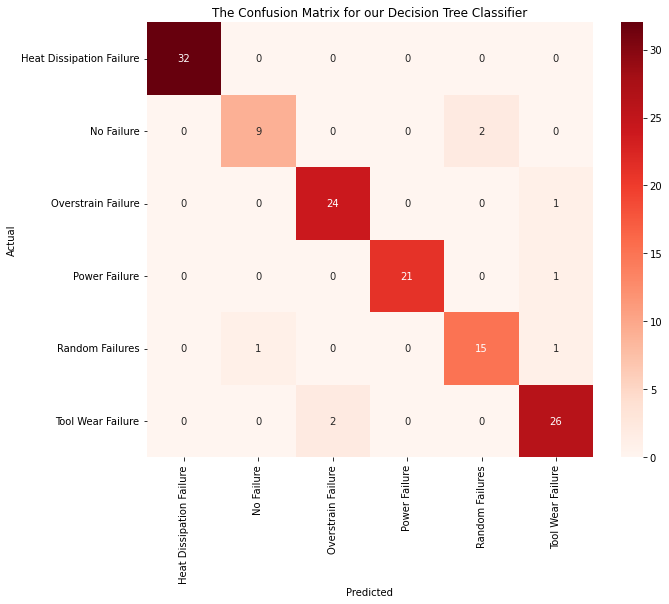

In [45]:
cm = confusion_matrix(y_test, y_pred_dt_tuned)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g', xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('The Confusion Matrix for our Decision Tree Classifier')
plt.show()

**- Insight:**

- the confusion matrix for tuned Decision Tree Classifier indicates overall good performance due to high true positive values beside 8 false positive (misclassifications).

### - Measure the cross-validated accuracy:

In [46]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(best_dt_model, X_train, y_train, cv=5, scoring='accuracy')

mean_cv_accuracy_dt = cross_val_scores.mean()

print("Mean Cross-Validated Accuracy:", round(mean_cv_accuracy_dt, 3))

Mean Cross-Validated Accuracy: 0.896


- This indicates a slight improvement over its predecessor (Tuned SVM) .

### - Print the classification report:

In [47]:
print("\033[1m\nThe Classification Report for our Decision Tree Classifier:\033[0m")
print(classification_report(y_test, y_pred_dt_tuned, target_names=class_names))


The Classification Report for our Decision Tree Classifier:
                          precision    recall  f1-score   support

Heat Dissipation Failure       1.00      1.00      1.00        32
              No Failure       0.90      0.82      0.86        11
      Overstrain Failure       0.92      0.96      0.94        25
           Power Failure       1.00      0.95      0.98        22
         Random Failures       0.88      0.88      0.88        17
       Tool Wear Failure       0.90      0.93      0.91        28

                accuracy                           0.94       135
               macro avg       0.93      0.92      0.93       135
            weighted avg       0.94      0.94      0.94       135



**Lessons Learnt:**

- **Effective Model:** Achieving a mean cross-validated accuracy of 0.89 demonstrates the effectiveness of the Decision Tree Classifier in accurately identifying machine failure types.
- **Class-Specific Insights:** Analysis of the classification report reveals varied performance across different failure types. While some classes exhibit high precision and recall, others indicate areas for improvement.
- **Holistic Evaluation:** Macro and weighted average F1-scores offer a holistic evaluation of the model's performance, guiding future enhancements to ensure balanced performance across all classes.


# Solution3: Random Forest Classifier:

**Solution and Justification:**

Random Forest Classifier (RF) is selected due to its robustness and ability to handle complex classification tasks with high-dimensional data. RF combines multiple decision trees to reduce overfitting and improve generalization, making it suitable for machine failure type classification.

**Solution Details:**

- **Hyperparameter Tuning:** Grid search is conducted over a hyperparameter grid comprising the number of estimators, maximum depth, minimum samples split, and minimum samples leaf parameters.

- **Model Training:** The Random Forest model is trained with the best hyperparameters obtained from grid search.

- **Testing:** The tuned model is evaluated on the test set to assess its performance.

- **Performance Metrics:** Test accuracy is computed to gauge the accuracy of the tuned Random Forest model. Additionally, a classification report can be generated to analyze precision, recall, and F1-score for each class.

In [48]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier()

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params_rf = grid_search.best_params_
print("Best Hyperparameters for Random Forest:", best_params_rf)

best_rf_model = RandomForestClassifier(**best_params_rf)

start_time = time.time()
best_rf_model.fit(X_train, y_train)
end_time = time.time()
training_time_rf = end_time - start_time
print("Training Time:", round(training_time_rf, 4), "seconds")

y_pred_rf_tuned = best_rf_model.predict(X_test)

Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Training Time: 2.175 seconds


### Visualize the trained model:
- By plotting the confusion matrix:

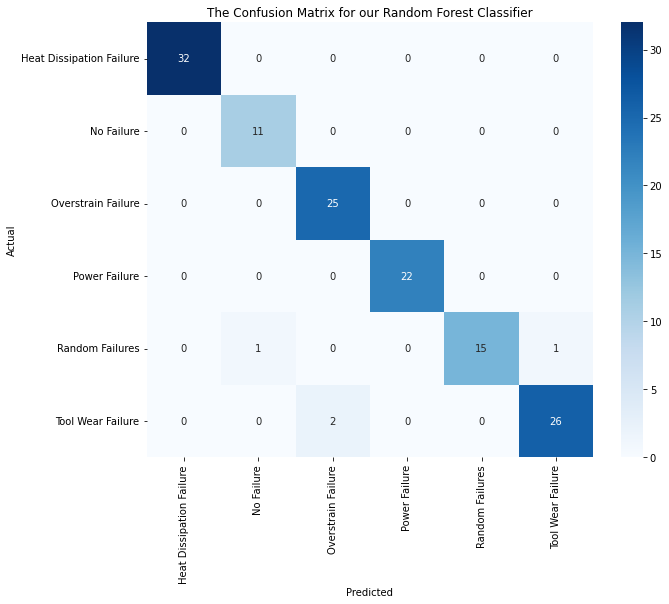

In [50]:
cm = confusion_matrix(y_test, y_pred_rf_tuned)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('The Confusion Matrix for our Random Forest Classifier')
plt.show()

**- Insight:**

- the confusion matrix for tuned Random Forest Classifier indicates overall very good performance due to higher true positive values beside just 4 false positive (2 for Random Failure, 2 for Tool Wear Failure)

- This indicates a good improvement over its predecessor (Tuned DT) .

### - Measure the cross-validated accuracy:

In [51]:
cross_val_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='accuracy')

mean_cv_accuracy_rf = cross_val_scores.mean()

print("Mean Cross-Validated Accuracy:", round(mean_cv_accuracy_rf, 3))

Mean Cross-Validated Accuracy: 0.95


### - Print the classification report:

In [52]:
print("\033[1m\nThe Classification Report for our Random Forest Classifier:\033[0m")
print(classification_report(y_test, y_pred_rf_tuned, target_names=class_names))


The Classification Report for our Random Forest Classifier:
                          precision    recall  f1-score   support

Heat Dissipation Failure       1.00      1.00      1.00        32
              No Failure       0.92      1.00      0.96        11
      Overstrain Failure       0.93      1.00      0.96        25
           Power Failure       1.00      1.00      1.00        22
         Random Failures       1.00      0.88      0.94        17
       Tool Wear Failure       0.96      0.93      0.95        28

                accuracy                           0.97       135
               macro avg       0.97      0.97      0.97       135
            weighted avg       0.97      0.97      0.97       135



**Lessons Learnt:**

- **Effective Model:** Achieving a mean cross-validated accuracy of 0.95 reflects the robustness and effectiveness of the Random Forest Classifier in accurately identifying machine failure types. The model demonstrates high performance across various failure types, showcasing its ability to generalize well on unseen data.

- **Class-Specific Insights:** The classification report reveals strong performance metrics such as precision, recall, and F1-score for most failure types. Notably, classes like "Heat Dissipation Failure" and "Power Failure" achieve perfect precision and recall, indicating the model's capability to classify these classes with high confidence.

- **Holistic Evaluation:** Macro and weighted average F1-scores provide comprehensive insights into the overall model performance, highlighting its balanced performance across all classes. The high macro average F1-score suggests that the model maintains a good balance between precision and recall across all classes.

**Moving Forward:**

In moving forward, we're considering exploring other ensemble learning techniques like XGBoost or stacking classifiers to potentially enhance our solution.


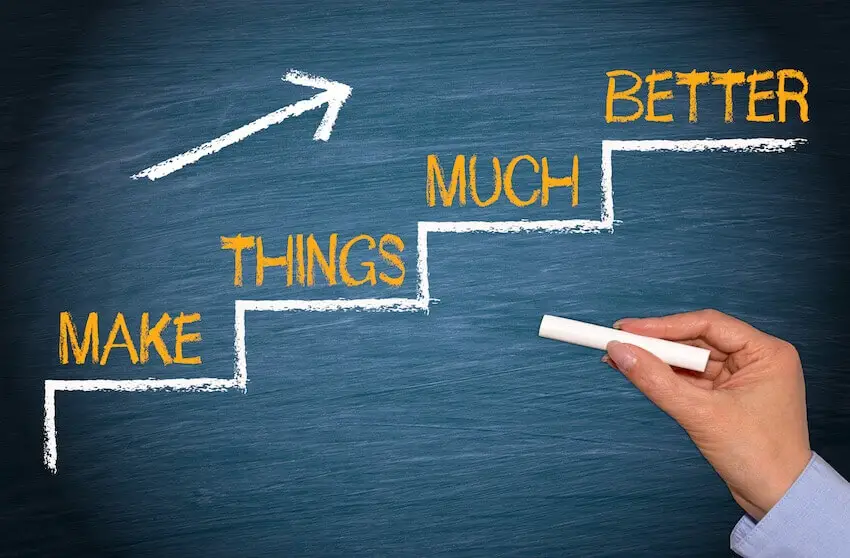

# An improvement step: Using Stacking Classifier

### Solution and Justification:

A Stacking Classifier is chosen for its ability to amalgamate the strengths of multiple base classifiers—Random Forest (RF), XGBoost (XGB), Extra Trees (ET), and AdaBoost (ADA),each with distinct methodologies:

1. **Random Forest (RF):** Utilizes an ensemble of decision trees with bootstrapped samples and random feature selection to reduce overfitting.

2. **XGBoost (XGB):** Implements gradient boosting, sequentially minimizing a loss function to improve accuracy efficiently.

3. **Extra Trees (ET):** Extends Random Forest with additional randomness in feature selection, enhancing model robustness.

4. **AdaBoost (ADA):** Focuses on misclassified instances, gradually boosting accuracy through iterative training.

By combining these diverse approaches, the Stacking Classifier achieves enhanced predictive performance.

### Solution Details:

- **Base Classifiers:** Four base classifiers are employed: Random Forest, XGBoost, Extra Trees, and AdaBoost. Each brings unique modeling approaches to the ensemble.

- **Meta-Classifier (Blender):** A Random Forest classifier is chosen as the meta-classifier, aligning with its robustness and effectiveness in handling diverse inputs from the base classifiers.

- **Stacking Classifier Construction:** The Stacking Classifier combines predictions from the base classifiers with the meta-classifier, using them as features for final prediction.

- **Training:** The Stacking Classifier is trained on the training data, utilizing predictions from the base classifiers as input features for the meta-classifier.

- **Testing:** After training, the Stacking Classifier is evaluated on the test set to assess predictive performance.

- **Performance Evaluation:** Test accuracy is computed to gauge performance on unseen data, alongside recording training time to assess computational efficiency.

In [53]:
from sklearn.ensemble import StackingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1)
xgb_model = XGBClassifier()
et_model = ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1)
ada_model = AdaBoostClassifier()

base_classifiers = [
    ('rf', rf_model), 
    ('xgb', xgb_model),
    ('et', et_model),
    ('ada', ada_model)
]

meta_classifier = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1)

stacking_clf = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier)

start_train_time = time.time()

stacking_clf.fit(X_train, y_train)

end_train_time = time.time()

training_time_stacking = end_train_time - start_train_time

y_pred_stacking = stacking_clf.predict(X_test)

print("Training Time Stacking Classifier:", round(training_time_stacking, 4), "seconds")

Training Time Stacking Classifier: 11.478 seconds


### Visualize the trained model:
- By plotting the confusion matrix:

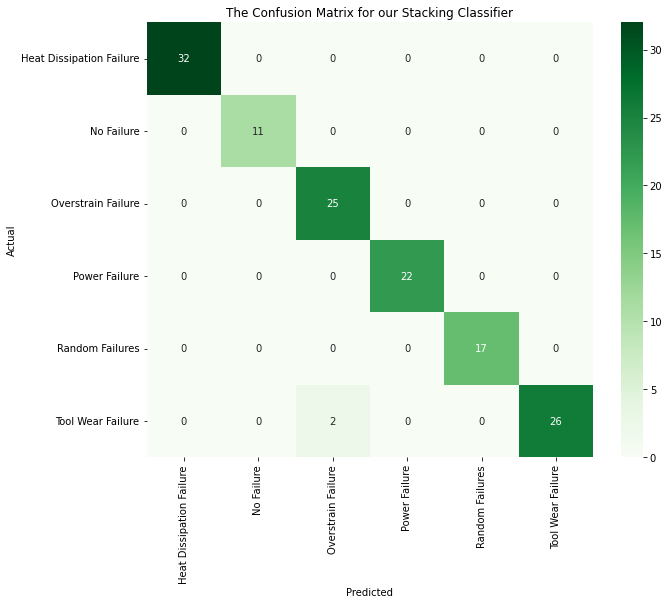

In [55]:
cm = confusion_matrix(y_test, y_pred_stacking)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('The Confusion Matrix for our Stacking Classifier')
plt.show()

**- Insight:**

- the confusion matrix for tuned Random Forest Classifier indicates overall excellent performance due to higher true positive values beside just 2 false positive for Tool Waer Failure.
- This indicates an outstanding improvement over its predecessor models.

### - Measure the cross-validated accuracy:

In [56]:
cross_val_scores = cross_val_score(stacking_clf, X_train, y_train, cv=5, scoring='accuracy')

mean_cv_accuracy_stacking = cross_val_scores.mean()

print("Mean Cross-Validated Accuracy:", round(mean_cv_accuracy_stacking, 3))

Mean Cross-Validated Accuracy: 0.955


### - Print the classification report:

In [57]:
print("\033[1m\nThe Classification Report for our Stacking Classifier:\033[0m")
print(classification_report(y_test, y_pred_stacking, target_names=class_names))


The Classification Report for our Stacking Classifier:
                          precision    recall  f1-score   support

Heat Dissipation Failure       1.00      1.00      1.00        32
              No Failure       1.00      1.00      1.00        11
      Overstrain Failure       0.93      1.00      0.96        25
           Power Failure       1.00      1.00      1.00        22
         Random Failures       1.00      1.00      1.00        17
       Tool Wear Failure       1.00      0.93      0.96        28

                accuracy                           0.99       135
               macro avg       0.99      0.99      0.99       135
            weighted avg       0.99      0.99      0.99       135



**Lessons Learnt:**

- **High Accuracy:** The Stacking Classifier achieves a test accuracy of 0.99 with efficient training in 10.5577 seconds, showcasing its effectiveness and efficiency. 

- **Consistent Performance:** Mean cross-validated accuracy of 0.96 confirms the model's robustness across different data subsets.

- **Detailed Insights:** The classification report reveals strong precision, recall, and F1-score for each failure type, highlighting the model's confidence and accuracy.

- **Moving Forward:** We may consider searching or collecting real data with a larger size and undergo thorough data preprocessing, feature engineering, and modeling using the same methodology.


In [62]:
import pandas as pd

data = {
    'Model': ['SVM', 'Decision Tree', 'Random Forest', 'Stacking Classifier'],
    'Mean Cross-Validated Accuracy': [mean_cv_accuracy_svm, mean_cv_accuracy_dt, mean_cv_accuracy_rf, mean_cv_accuracy_stacking],
    'Training Time (seconds)': [training_time_svm, training_time_dt, training_time_rf, training_time_stacking]
}

df = pd.DataFrame(data)

df_rounded = df.round({'Mean Cross-Validated Accuracy': 2, 'Training Time (seconds)': 2})

df_rounded

,Model,Mean Cross-Validated Accuracy,Training Time (seconds)
0,SVM,0.88,0.03
1,Decision Tree,0.90,0.01
2,Random Forest,0.95,2.18
3,Stacking Classifier,0.96,11.48


## Final Results and Conclusion:

**Step 1: Highest Accuracy Models**
- The Stacking Classifier achieved the highest mean cross-validated accuracy of 0.96, closely followed by the Random Forest model with an accuracy of 0.95.

**Step 2: Training Time Comparison**
- The Stacking Classifier had the longest training time of 11.48 seconds, significantly higher than other models.
- Decision Tree had the shortest training time of only 0.01 seconds.

**Step 3: Trade-off Analysis**
- If training time is critical and sacrificing a bit of accuracy is acceptable, Decision Tree might be preferred due to its short training time.
- If accuracy is paramount and training time is not a concern, the Stacking Classifier or Random Forest would be the better choices.
- For a balance between accuracy and training time, Random Forest could be a good compromise.


## An important note:

It's worth noting that while retraining the models may lead to slight variations in test accuracy, mean cross-validated accuracy, and training time, even with a fixed random state. This variation may stem from the limited amount of data, especially following resampling techniques like combining undersampling and oversampling.

However, despite these potential fluctuations, our analysis consistently shows that Random Forest outperforms Decision Tree and Support Vector Classifier (SVC) in terms of accuracy. Additionally, the Stacking Classifier consistently emerges as the top performer among all models considered.

Therefore, while there may be minor changes in performance metrics upon retraining, the overarching conclusion remains unchanged: the Stacking Classifier stands as the optimal choice for deployment, offering the highest accuracy and reliability for our specific application.

### The Final Product:

- We will choose the Stacking Classifier for deployment. With its exceptional accuracy, it promises to provide reliable predictions in real-world scenarios, making it the preferred choice for practical applications.

In [60]:
# Save the model to a file
joblib.dump(stacking_clf, 'stacking_clf_model.pkl')

['stacking_clf_model.pkl']

### - Prediction Function:

Here we built a failure prediction system for industrial processes using the following steps:

1. **Loading**: Load pre-trained scaler and model.
2. **Prediction Function**: Function to predict failure based on input.
3. **Encoding**: Convert product quality type to numerical values.
4. **Validation**: Check input validity.
5. **Feature Calculation**: Calculate additional features.
6. **Scaling**: Scale input features.
7. **Prediction**: Use model to predict failure.
8. **Decoding**: Convert numeric prediction to labels.
9. **User Interface**: Set up interface with input fields.
10. **Trigger Prediction**: Button triggers prediction.
11. **Display Results**: Output predicted label and probability.


In [2]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import joblib
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")

scaler = joblib.load('scaler.pkl')
stacking_clf_model = joblib.load('stacking_clf_model.pkl')

# Function to perform prediction
def prediction_function(product_quality_type, air_temperature, process_temperature,
                        rotational_speed, torque, tool_wear):
    try:
        product_quality_encoding = {'M': 2, 'L': 1, 'H': 0}
        product_quality_encoded = product_quality_encoding.get(product_quality_type, -1)

        if product_quality_encoded == -1:
            return {'error': 'Invalid Product Quality Type! Please choose M, L, or H.'}

        if not all(isinstance(val, (int, float)) for val in [air_temperature, process_temperature,
                                                             rotational_speed, torque, tool_wear]):
            return {'error': 'Please enter numeric values for all input fields except Product Quality Type.'}

        temperature_differential = process_temperature - air_temperature
        power_consumption = rotational_speed * torque

        input_data = np.array([[product_quality_encoded, air_temperature, process_temperature,
                                rotational_speed, torque, tool_wear, temperature_differential, power_consumption]])

        scaled_values = scaler.transform(input_data)

        predicted_value = stacking_clf_model.predict(scaled_values)
        
        probabilities = stacking_clf_model.predict_proba(scaled_values)

        predicted_labels = {0: 'Heat Dissipation Failure', 1: 'No Failure', 2: 'Overstrain Failure',
                            3: 'Power Failure', 4: 'Random Failures', 5: 'Tool Wear Failure'}
        predicted_label = predicted_labels.get(predicted_value[0])

        predicted_prob = probabilities[0][predicted_value[0]]

        return {'predicted_label': predicted_label, 'predicted_prob': predicted_prob}

    except ValueError:
        return {'error': 'Please enter numeric values for all input fields except Product Quality Type.'}

product_quality_type = widgets.Dropdown(options=['L', 'M', 'H'], description='Product Quality Type:')
air_temperature = widgets.FloatText(description='Air Temperature:')
process_temperature = widgets.FloatText(description='Process Temperature:')
rotational_speed = widgets.FloatText(description='Rotational Speed:')
torque = widgets.FloatText(description='Torque:')
tool_wear = widgets.FloatText(description='Tool Wear:')

button = widgets.Button(description='Predict')

output = widgets.Output()

def on_button_click(b):
    with output:
        output.clear_output()
        result = prediction_function(product_quality_type.value, air_temperature.value,
                                     process_temperature.value, rotational_speed.value,
                                     torque.value, tool_wear.value)
        print(result)

button.on_click(on_button_click)

input_widgets = widgets.VBox([product_quality_type, air_temperature, process_temperature,
                              rotational_speed, torque, tool_wear, button])
display(input_widgets, output)

Output()

### - An example to try:

- You can try this values as unseen data to get the prediction (just put them in the blanks fields when run the last cell) : L,299,313,1640,43,23

- you will get: {'predicted_label': 'No Failure', 'predicted_prob': 0.59}

### An Important Consideration:

This is a simple interface designed to showcase the functionality of our system and consolidate all processes from data collection to result retrieval in one place. However, it's important to note that we have also developed a Flask web application for our QuAM.